<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/heatmap_own.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [17]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 15kB/s 
     |████████████████████████████████| 4.0MB 31.5MB/s 
  Found existing installation: torch 1.5.1+cu101
    Uninstalling torch-1.5.1+cu101:
      Successfully uninstalled torch-1.5.1+cu101
  Found existing installation: torchvision 0.6.1+cu101
    Uninstalling torchvision-0.6.1+cu101:
      Successfully uninstalled torchvision-0.6.1+cu101


In [1]:
from fastai import *
from fastai.vision import *

In [2]:
path = untar_data(URLs.PETS)

In [3]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [4]:
path_img = path/'images'
path_img.ls()[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Siamese_39.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Siamese_257.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_112.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/leonberger_49.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_52.jpg')]

In [5]:
src = ImageList.from_folder(path_img).split_by_rand_pct(0.2)

In [6]:
test = path_img.ls()[0]
test.stem.rsplit('_', 1)[0]

'Siamese'

In [7]:
def get_name(new_path): return new_path.stem.rsplit('_', 1)[0]

In [8]:
src = src.label_from_func(get_name); src

LabelLists;

Train: LabelList (5912 items)
x: ImageList
Image (3, 333, 500),Image (3, 289, 300),Image (3, 199, 300),Image (3, 375, 500),Image (3, 333, 500)
y: CategoryList
Siamese,Siamese,pomeranian,leonberger,great_pyrenees
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 500, 490),Image (3, 500, 335),Image (3, 300, 400),Image (3, 218, 300),Image (3, 375, 500)
y: CategoryList
Abyssinian,american_pit_bull_terrier,Abyssinian,Maine_Coon,Persian
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

In [9]:
doc(get_transforms)

In [10]:
tfms = get_transforms(do_flip=True, flip_vert= False, max_rotate = 10.0, max_zoom= 1.2, max_lighting= .2, max_warp= 0.2, p_affine = 1., p_lighting= 1.)

In [11]:
bs = 64
data = src.transform(tfms, size = 224, padding_mode = 'reflection').databunch(bs = bs, no_check=True).normalize(imagenet_stats)

In [12]:
learn = cnn_learner(data, models.resnet34, metrics = (error_rate))

In [13]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


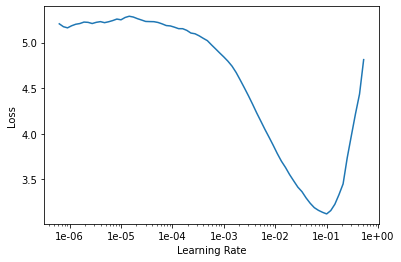

In [14]:
learn.recorder.plot()

In [15]:
test_img = open_image(path_img.ls()[0])

In [16]:
test_img.size

torch.Size([333, 500])

In [ ]:
learn.summary()

In [17]:
learn.fit_one_cycle(2, slice(4e-03))

epoch,train_loss,valid_loss,error_rate,time
0,1.038430,0.292215,0.098106,01:52
1,0.502659,0.249923,0.073748,01:51


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


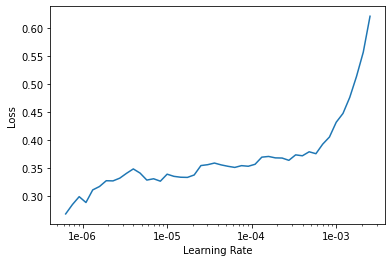

In [18]:
learn.save('stage-1')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(3, max_lr= slice(1e-05, 7e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.386981,0.340519,0.104871,01:56
1,0.288562,0.237999,0.067659,01:57
2,0.174544,0.220981,0.064276,01:58


In [20]:
learn.save('stage-2')

In [21]:
new_data = src.transform(tfms, size = 356, padding_mode = 'reflection').databunch(bs = bs, no_check=True).normalize(imagenet_stats)

In [22]:
learn = cnn_learner(new_data, models.resnet34, metrics = error_rate)
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 356, 356),Image (3, 356, 356),Image (3, 356, 356),Image (3, 356, 356),Image (3, 356, 356)
y: CategoryList
Siamese,Siamese,pomeranian,leonberger,great_pyrenees
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 356, 356),Image (3, 356, 356),Image (3, 356, 356),Image (3, 356, 356),Image (3, 356, 356)
y: CategoryList
Abyssinian,american_pit_bull_terrier,Abyssinian,Maine_Coon,Persian
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), 

In [23]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 178, 178]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 178, 178]       128        True      
______________________________________________________________________
ReLU                 [64, 178, 178]       0          False     
______________________________________________________________________
MaxPool2d            [64, 89, 89]         0          False     
______________________________________________________________________
Conv2d               [64, 89, 89]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 89, 89]         128        True      
______________________________________________________________________
ReLU                 [64, 89, 89]         0          False     
___________________________________________________

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


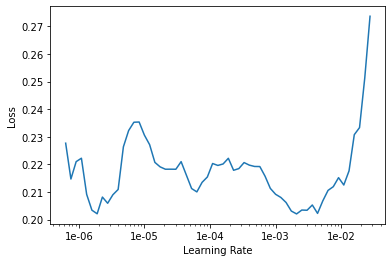

In [24]:
learn.lr_find()
learn.recorder.plot()

In [25]:
learn.fit_one_cycle(3, max_lr = slice(1e-05, 4e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.296837,0.272756,0.077808,03:25
1,0.264501,0.217357,0.062923,03:23
2,0.176689,0.202249,0.058863,03:20


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


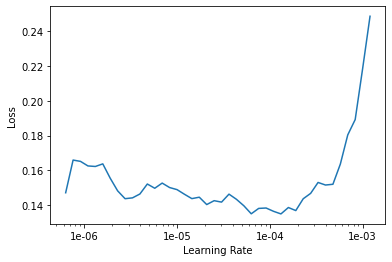

In [26]:
learn.save('stage-4')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [27]:
learn.fit_one_cycle(2, max_lr = slice(1e-06, 2e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.158703,0.188804,0.052774,03:36
1,0.125122,0.184042,0.048714,03:33


In [28]:
learn.save('stage-5')

In [33]:
t = test_img.data; t.shape

torch.Size([3, 333, 500])

In [34]:
k = tensor([[0, -5/3, 1.], [-5/3, -5/3, 1.], [1., 1., 1.]])
k = k.expand(1, 3, 3, 3)/6.

In [43]:
k.shape

torch.Size([1, 3, 3, 3])

In [46]:
t.shape
t[None].shape

torch.Size([1, 3, 333, 500])

In [52]:
br = F.conv2d(t[None], k)
br.shape

torch.Size([1, 1, 331, 498])

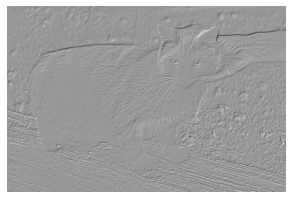

In [54]:
show_image(br[0], figsize = (5, 5))

In [55]:
m = learn.model.eval()

In [57]:
idx = 0
x, y = data.valid_ds[idx]

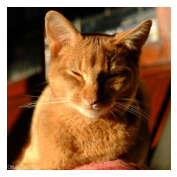

In [60]:
x.show()

In [71]:
xb = data.one_item(x); xb[0].shape, x.shape, xb[0], x.data

(torch.Size([1, 3, 356, 356]),
 torch.Size([3, 356, 356]),
 tensor([[[[-2.0665, -2.0772, -2.0536,  ...,  1.7150,  1.5519,  1.6329],
           [-2.0818, -2.0925, -2.0689,  ...,  1.6891,  1.5806,  1.6343],
           [-2.0540, -2.0652, -2.0896,  ...,  1.6826,  1.6207,  1.7287],
           ...,
           [-1.9606, -1.8990, -1.7854,  ..., -0.6354, -0.6714, -0.5198],
           [-1.8591, -1.8331, -1.7136,  ..., -0.6052, -0.6542, -0.5072],
           [-1.8259, -1.7745, -1.6417,  ..., -0.6038, -0.6681, -0.5276]],
 
          [[-1.9832, -1.9941, -1.9700,  ...,  0.8141,  0.6850,  0.8184],
           [-1.9988, -2.0097, -1.9856,  ...,  0.7777,  0.7235,  0.8511],
           [-1.9704, -1.9819, -2.0068,  ...,  0.7899,  0.8060,  0.9514],
           ...,
           [-1.9832, -1.9983, -1.8809,  ..., -0.7515, -0.7872, -0.6314],
           [-1.9406, -1.9712, -1.9013,  ..., -0.7709, -0.8007, -0.6342],
           [-1.9108, -1.9502, -1.9001,  ..., -0.8278, -0.8308, -0.6550]],
 
          [[-1.7701, -1.774

In [75]:
xb, _ = data.one_item(x)
xb, _

(tensor([[[[-2.0665, -2.0772, -2.0536,  ...,  1.7150,  1.5519,  1.6329],
           [-2.0818, -2.0925, -2.0689,  ...,  1.6891,  1.5806,  1.6343],
           [-2.0540, -2.0652, -2.0896,  ...,  1.6826,  1.6207,  1.7287],
           ...,
           [-1.9606, -1.8990, -1.7854,  ..., -0.6354, -0.6714, -0.5198],
           [-1.8591, -1.8331, -1.7136,  ..., -0.6052, -0.6542, -0.5072],
           [-1.8259, -1.7745, -1.6417,  ..., -0.6038, -0.6681, -0.5276]],
 
          [[-1.9832, -1.9941, -1.9700,  ...,  0.8141,  0.6850,  0.8184],
           [-1.9988, -2.0097, -1.9856,  ...,  0.7777,  0.7235,  0.8511],
           [-1.9704, -1.9819, -2.0068,  ...,  0.7899,  0.8060,  0.9514],
           ...,
           [-1.9832, -1.9983, -1.8809,  ..., -0.7515, -0.7872, -0.6314],
           [-1.9406, -1.9712, -1.9013,  ..., -0.7709, -0.8007, -0.6342],
           [-1.9108, -1.9502, -1.9001,  ..., -0.8278, -0.8308, -0.6550]],
 
          [[-1.7701, -1.7742, -1.7390,  ...,  0.4683,  0.3288,  0.4100],
           [-

In [78]:
data.denorm(xb)[0]

tensor([[[1.1765e-02, 9.3234e-03, 1.4725e-02,  ..., 8.7774e-01,
          8.4038e-01, 8.5893e-01],
         [8.2656e-03, 5.8243e-03, 1.1226e-02,  ..., 8.7180e-01,
          8.4696e-01, 8.5925e-01],
         [1.4625e-02, 1.2065e-02, 6.4856e-03,  ..., 8.7030e-01,
          8.5614e-01, 8.8088e-01],
         ...,
         [3.6021e-02, 5.0126e-02, 7.6139e-02,  ..., 3.3950e-01,
          3.3124e-01, 3.6597e-01],
         [5.9256e-02, 6.5209e-02, 9.2594e-02,  ..., 3.4642e-01,
          3.3519e-01, 3.6884e-01],
         [6.6873e-02, 7.8649e-02, 1.0905e-01,  ..., 3.4672e-01,
          3.3200e-01, 3.6417e-01]],

        [[1.1765e-02, 9.3234e-03, 1.4725e-02,  ..., 6.3835e-01,
          6.0943e-01, 6.3932e-01],
         [8.2656e-03, 5.8244e-03, 1.1226e-02,  ..., 6.3020e-01,
          6.1806e-01, 6.4664e-01],
         [1.4625e-02, 1.2065e-02, 6.4856e-03,  ..., 6.3293e-01,
          6.3654e-01, 6.6911e-01],
         ...,
         [1.1765e-02, 8.3776e-03, 3.4686e-02,  ..., 2.8767e-01,
          2.796

In [76]:
xb_im = Image(data.denorm(xb)[0])

In [79]:
xb = xb.cuda()

In [81]:
from fastai.callbacks.hooks import *

In [83]:
def hook_backward(cat = y):
  with hook_output(m[0]) as hook_a:
    with hook_output(m[0], grad= True) as hook_g:
      preds = m(xb)
      preds[idx, int(cat)].backward()
  return hook_a, hook_g

In [84]:
hook_a, hook_g = hook_backward()

In [90]:
acts = hook_a.stored[0].cpu()

In [92]:
acts.shape; acts

tensor([[[2.1446, 1.3594, 1.4313,  ..., 1.0263, 0.1390, 0.2616],
         [0.7254, 0.5638, 1.8643,  ..., 3.1270, 0.8884, 0.8529],
         [1.4363, 1.4965, 1.6251,  ..., 2.5916, 0.9548, 0.6527],
         ...,
         [0.1490, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.4623, 0.0000, 0.2235,  ..., 0.0000, 0.0000, 0.2921],
         [1.5033, 0.6853, 0.0000,  ..., 1.1968, 0.0000, 0.4471]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 1.5985,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.5473, 2.5657,  ..., 0.0909, 0.0000, 0.0000],
         ...,
         [0.3031, 0.6028, 0.1897,  ..., 0.0000, 0.0000, 0.0000],
         [0.5729, 0.5503, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.4433, 0.0000, 0.0000,  ..., 0.6200, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.4288, 0.3060, 0.0000],
         [0.0000, 0.0000, 1.2960,  ..., 3.2993, 2.2895, 0.0907],
         [0.0360, 1.0327, 5.3042,  ..., 3.9560, 2.4736, 0.

In [94]:
avg_acts = acts.mean(0)
avg_acts, avg_acts.shape

(tensor([[1.0893, 0.7182, 0.6485, 0.7766, 0.7590, 0.6288, 0.4501, 0.4745, 0.4957,
          0.4462, 0.4413, 0.3746],
         [0.5802, 0.6534, 0.9730, 1.4312, 1.3008, 0.9793, 0.8941, 0.9504, 1.0750,
          0.9296, 0.5499, 0.3270],
         [0.3435, 0.5440, 1.1677, 1.7167, 1.6481, 1.3447, 1.3019, 1.4750, 1.5923,
          1.2406, 0.6770, 0.3321],
         [0.4009, 0.7171, 1.3240, 1.7657, 1.6970, 1.4828, 1.4859, 1.6123, 1.7360,
          1.3161, 0.7991, 0.3974],
         [0.5555, 0.8963, 1.3086, 1.6112, 1.5274, 1.4637, 1.4748, 1.5317, 1.5718,
          1.2076, 0.7642, 0.3862],
         [0.7218, 1.0917, 1.3427, 1.5112, 1.4523, 1.3984, 1.3605, 1.4048, 1.4449,
          1.0971, 0.6466, 0.3142],
         [0.8449, 1.2085, 1.4269, 1.5635, 1.6005, 1.6035, 1.5519, 1.5720, 1.5236,
          1.1923, 0.6094, 0.2674],
         [0.7790, 1.1634, 1.3479, 1.5202, 1.5309, 1.5858, 1.5714, 1.5924, 1.6185,
          1.3318, 0.7054, 0.2731],
         [0.6320, 0.9206, 1.1654, 1.3506, 1.4271, 1.4144, 1.3855

In [96]:
def show_heatmap(hm):
    _,ax = plt.subplots()
    xb_im.show(ax)
    ax.imshow(hm, alpha=0.6, extent=(0,352,352,0),
              interpolation='bilinear', cmap='magma');

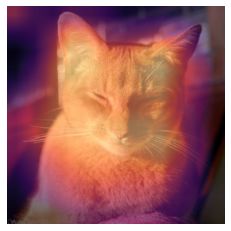

In [97]:
show_heatmap(avg_acts)